<a href="https://colab.research.google.com/github/RCutrino/MLPNS_RCutrino/blob/main/MLPNS23_bootcamp17_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import pylab as pl
import scipy as sp
from scipy import stats

In [3]:
eqs = pd.read_csv("https://github.com/fedhere/MLPNS_FBianco/blob/main/statistics/KStest/earthquakes.csv?raw=true", sep = " ")
eqs

,#YYY/MM/DD,HH:mm:SS.ss,ET,GT,MAG,Unnamed: 5,M,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Q,Unnamed: 25,EVID,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,NPH,NGRM
0,1984/01/01,01:30:57.52,eq,NaN,l,2.02,c,NaN,NaN,33.24600,...,17.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1984/01/01,05:31:34.16,eq,NaN,l,2.12,c,NaN,NaN,32.94500,...,42.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1984/01/01,06:59:05.14,eq,NaN,l,2.43,c,NaN,NaN,33.34300,...,30.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1984/01/01,11:10:25.29,eq,NaN,l,2.07,c,NaN,NaN,33.66800,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1984/01/01,19:38:19.79,eq,NaN,l,2.13,c,NaN,NaN,33.96300,...,49.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70793,2002/12/29,19:37:24.56,eq,NaN,l,2.21,l,NaN,NaN,35.31400,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
70794,2002/12/29,20:17:33.40,eq,NaN,l,2.02,l,NaN,NaN,35.32133,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
70795,2002/12/29,20:21:28.73,eq,NaN,l,2.07,l,NaN,NaN,35.32150,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
70796,2002/12/30,21:51:52.55,eq,NaN,l,2.31,l,NaN,NaN,35.31867,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
eqs.columns

Index(['#YYY/MM/DD', 'HH:mm:SS.ss', 'ET', 'GT', 'MAG', 'Unnamed: 5', 'M',
       'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'LAT', 'Unnamed: 11',
       'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15',
       'Unnamed: 16', 'LON', 'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20',
       'Unnamed: 21', 'Unnamed: 22', 'DEPTH', 'Q', 'Unnamed: 25', 'EVID',
       'Unnamed: 27', 'Unnamed: 28', 'Unnamed: 29', 'Unnamed: 30',
       'Unnamed: 31', 'NPH', 'NGRM'],
      dtype='object')

In [5]:
eqs.rename({'#YYY/MM/DD': 'date',
            'HH:mm:SS.ss': 'time'}, axis=1, inplace=True)
eqs.head()

,date,time,ET,GT,MAG,Unnamed: 5,M,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Q,Unnamed: 25,EVID,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,NPH,NGRM
0,1984/01/01,01:30:57.52,eq,NaN,l,2.02,c,NaN,NaN,33.246,...,17.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1984/01/01,05:31:34.16,eq,NaN,l,2.12,c,NaN,NaN,32.945,...,42.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1984/01/01,06:59:05.14,eq,NaN,l,2.43,c,NaN,NaN,33.343,...,30.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1984/01/01,11:10:25.29,eq,NaN,l,2.07,c,NaN,NaN,33.668,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1984/01/01,19:38:19.79,eq,NaN,l,2.13,c,NaN,NaN,33.963,...,49.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
eqs.time.dtype, eqs.date.dtype

(dtype('O'), dtype('O'))

In [7]:
pd.to_datetime("1984/01/01" + " " + "19:38:19.79")

Timestamp('1984-01-01 19:38:19.790000')

In [8]:
eqs.date.map(pd.to_datetime)

0       1984-01-01
1       1984-01-01
2       1984-01-01
3       1984-01-01
4       1984-01-01
           ...    
70793   2002-12-29
70794   2002-12-29
70795   2002-12-29
70796   2002-12-30
70797   2002-12-30
Name: date, Length: 70798, dtype: datetime64[ns]

In [9]:
for i in range(len(eqs)):
  if eqs.iloc[i]['time'].endswith("60.00"):
    print(eqs.iloc[i]['time'])
    print(eqs.iloc[i]['time'].replace("60.00", "59.99"))
    eqs.at[i, 'time'] = eqs.iloc[i]['time'].replace("60.00", "59.99")
    print(eqs.iloc[i]['time'])

04:48:60.00
04:48:59.99
04:48:59.99
14:19:60.00
14:19:59.99
14:19:59.99
21:48:60.00
21:48:59.99
21:48:59.99
15:34:60.00
15:34:59.99
15:34:59.99
06:41:60.00
06:41:59.99
06:41:59.99


In [10]:
eqs['datetime'] = [eqs.iloc[i].date + " " + eqs.iloc[i].time for i in range(len(eqs))]
eqs["datetime"] = eqs["datetime"].map(pd.to_datetime)

In [11]:
for i in range(10):
  print(eqs.iloc[i].date + " " + eqs.iloc[i].time)

1984/01/01 01:30:57.52
1984/01/01 05:31:34.16
1984/01/01 06:59:05.14
1984/01/01 11:10:25.29
1984/01/01 19:38:19.79
1984/01/01 19:39:19.67
1984/01/01 20:19:47.21
1984/01/02 03:51:52.76
1984/01/02 05:00:12.44
1984/01/02 05:02:17.29


In [12]:
#delete
# first I create the timetamps pairs for the beginning and end of the valid periods. 
# I do it with a for loop that appends pairs of timestamps to a list that I create at the beginning

# create empty container
ss = []

# loop through all year pairs as year and fraction of year
for t in [(1984, 1986.5), 
          (1990.3, 1992.1), 
          (1994.6, 1995.6),
          (1996.1,1996.5), 
          (1997,1997.6), 
          (1997.75,1998.15), 
          (1998.25,1999.35), 
          (2000.55,2000.8),
          (2000.9 ,2001.25), 
          (2001.6 ,2002), 
          (2002.5 ,2003)]:
    
    # for each pair I convert the year to datetime (easy)
    # then I convert the fraction of year and convert it to days and convert that to a delta-time
    # finally I add that deltatime to the year datetime. 
    ss.append((pd.to_datetime(int(t[0]), format="%Y") 
        + pd.Timedelta('%.f days'%((t[0] - int(t[0])) * 365.25)),
               pd.to_datetime(int(t[1]), format="%Y") 
        + pd.Timedelta('%.f days'%((t[1] - int(t[1])) * 365.25))))

In [13]:
ss

[(Timestamp('1984-01-01 00:00:00'), Timestamp('1986-07-03 00:00:00')),
 (Timestamp('1990-04-21 00:00:00'), Timestamp('1992-02-07 00:00:00')),
 (Timestamp('1994-08-08 00:00:00'), Timestamp('1995-08-08 00:00:00')),
 (Timestamp('1996-02-07 00:00:00'), Timestamp('1996-07-02 00:00:00')),
 (Timestamp('1997-01-01 00:00:00'), Timestamp('1997-08-08 00:00:00')),
 (Timestamp('1997-10-02 00:00:00'), Timestamp('1998-02-25 00:00:00')),
 (Timestamp('1998-04-02 00:00:00'), Timestamp('1999-05-09 00:00:00')),
 (Timestamp('2000-07-20 00:00:00'), Timestamp('2000-10-19 00:00:00')),
 (Timestamp('2000-11-25 00:00:00'), Timestamp('2001-04-02 00:00:00')),
 (Timestamp('2001-08-08 00:00:00'), Timestamp('2002-01-01 00:00:00')),
 (Timestamp('2002-07-03 00:00:00'), Timestamp('2003-01-01 00:00:00'))]

In [14]:
gooddates = ((eqs.datetime >= ss[0][0]) * (eqs.datetime <= ss[0][1]) +\
            (eqs.datetime >= ss[1][0]) * (eqs.datetime <= ss[1][1]) +\
            (eqs.datetime >= ss[2][0]) * (eqs.datetime <= ss[2][1]) +\
            (eqs.datetime >= ss[3][0]) * (eqs.datetime <= ss[3][1]) +\
            (eqs.datetime >= ss[4][0]) * (eqs.datetime <= ss[4][1]) +\
            (eqs.datetime >= ss[5][0]) * (eqs.datetime <= ss[5][1]) +\
            (eqs.datetime >= ss[6][0]) * (eqs.datetime <= ss[6][1]) +\
            (eqs.datetime >= ss[7][0]) * (eqs.datetime <= ss[7][1]) +\
            (eqs.datetime >= ss[8][0]) * (eqs.datetime <= ss[8][1]) +\
            (eqs.datetime >= ss[9][0]) * (eqs.datetime <= ss[9][1]) +\
            (eqs.datetime >= ss[10][0]) * (eqs.datetime <= ss[10][1])).values

In [15]:
gooddates

array([ True,  True,  True, ...,  True,  True,  True])

In [16]:
eqs.columns

Index(['date', 'time', 'ET', 'GT', 'MAG', 'Unnamed: 5', 'M', 'Unnamed: 7',
       'Unnamed: 8', 'Unnamed: 9', 'LAT', 'Unnamed: 11', 'Unnamed: 12',
       'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'LON',
       'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21',
       'Unnamed: 22', 'DEPTH', 'Q', 'Unnamed: 25', 'EVID', 'Unnamed: 27',
       'Unnamed: 28', 'Unnamed: 29', 'Unnamed: 30', 'Unnamed: 31', 'NPH',
       'NGRM', 'datetime'],
      dtype='object')

In [17]:
eqGoodData = eqs[gooddates][["datetime", "Unnamed: 5"]]

In [18]:
eqGoodData.rename({"Unnamed: 5":"MAG"},axis=1, inplace=True)

In [19]:
eqGoodData = eqGoodData[eqGoodData["MAG"] >=2]

In [20]:
eqGoodData.shape

(18852, 2)

In [21]:
eqGoodData["gaps"] = eqGoodData["datetime"].diff().values.astype(float)
eqGoodData= eqGoodData[1:]

In [23]:
eqGoodData.describe()

,MAG,gaps
count,18851.000000,1.885100e+04
mean,2.399508,3.180324e+13
std,0.392437,1.103955e+15
min,2.000000,1.700000e+08
25%,2.110000,2.737220e+12
50%,2.290000,8.947620e+12
75%,2.570000,2.133972e+13
max,5.800000,1.199632e+17


In [25]:
monthgap = 2.628e+15 #mese in nanosecondi
eqGoodData =  eqGoodData[eqGoodData.gaps < monthgap] #rimuovo i gap superiori a un mese tra un terremoto e l'altro

<Axes: ylabel='Frequency'>

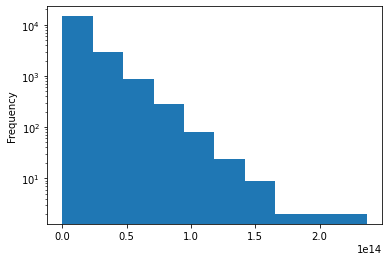

In [26]:
eqGoodData["gaps"].plot(kind="hist",logy=True)

In [27]:
alpha = 0.003 #3sigma

In [28]:
import numpy as np
t1 = eqGoodData["gaps"][eqGoodData.MAG >=2]
t2 = eqGoodData["gaps"][eqGoodData.MAG >=2.5]
#t1 = t1[t1 <3e16]
sp.stats.ks_2samp(np.log10(t1), np.log10(t2))

KstestResult(statistic=0.027581930568767787, pvalue=0.0024725857409166265, statistic_location=12.4585124519953, statistic_sign=-1)

(array([0.7986014 , 0.93776224, 0.97902098, 0.99388112, 0.99772727,
        0.99895105, 0.99947552, 0.99982517, 0.99982517, 1.        ]),
 array([1.70000000e+08, 2.36584280e+13, 4.73166860e+13, 7.09749440e+13,
        9.46332020e+13, 1.18291460e+14, 1.41949718e+14, 1.65607976e+14,
        1.89266234e+14, 2.12924492e+14, 2.36582750e+14]),
 [<matplotlib.patches.Polygon at 0x7f1e9e033a60>])

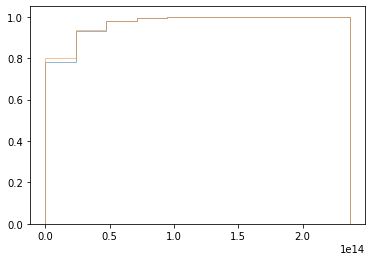

In [29]:
pl.hist(t1, cumulative = True, alpha = 0.5, histtype= "step", density=1)
pl.hist(t2, cumulative = True, alpha = 0.5, histtype= "step", density=1)

original data size: 18840
removing time gaps that are too long. new size: 18837
mean unrescaled time gap 19250664939215.375
removing time gaps too small, first pass: new size 17850
mean unrescaled time gap 1.055
removing time gaps too small, second pass: new size 17821
mean unrescaled time gap 1.002
  
original data size: 5719
removing time gaps that are too long. new size: 5716
mean unrescaled time gap 63383511726731.977
removing time gaps too small, first pass: new size 5339
mean unrescaled time gap 1.070
removing time gaps too small, second pass: new size 5319
mean unrescaled time gap 1.004
  
original data size: 1463
removing time gaps that are too long. new size: 1460
mean unrescaled time gap 247595145239726.031
removing time gaps too small, first pass: new size 1322
mean unrescaled time gap 1.104
removing time gaps too small, second pass: new size 1318
mean unrescaled time gap 1.003
  
original data size: 428
removing time gaps that are too long. new size: 425
mean unrescaled tim

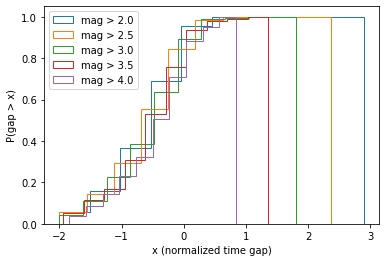

In [30]:
#delete
def rescale(df, threshold=0.01):
    times = [] # container for all arrays of rescaled time gaps (for 5 magnitude thresholds)
    hss = [] # container for heights of histograms
    binss = [] # container for bins of histograms

    for m in [2, 2.5, 3, 3.5, 4]:
        #select magnitude and convert to floating point numbers
        tmp = df['datetime'][df.MAG >= m].diff().values[1:].astype(float)
        print("original data size:", len(tmp))
    
        tmp = tmp[tmp < 3e16] #cut outliers(optional)
        print("removing time gaps that are too long. new size:", len(tmp))
   
   #itetatu cuts for stability
        rs = tmp.mean()
        print("mean unrescaled time gap {:.3f}".format(rs))
        tmp = tmp[tmp / rs >= threshold] / rs #rescaling tramite la media
        print("removing time gaps too small, first pass: new size", len(tmp))
   
        rs = tmp.mean()
        print("mean unrescaled time gap {:.3f}".format(rs))
        tmp = tmp[tmp / rs >= threshold] / rs
        print("removing time gaps too small, second pass: new size", len(tmp))
 
        rs = tmp.mean()
        print("mean unrescaled time gap {:.3f}".format(rs))
    
        tmp = tmp / rs
        print("  ")
    
        times.append(np.log10(tmp)) #conversione sul log
    
        #calculate the histogram of the last array of times (the one that you just calculated)
        hs, bins, patch= pl.hist(times[-1], 
                             cumulative=True, density=1, histtype="step", label="mag > %.1f"%m)
        hss.append(hs)
        binss.append(bins)

    pl.legend(fontsize=10)
    pl.xlabel("x (normalized time gap)")
    pl.ylabel("P(gap > x)")
    return binss, hss, times
  
binss, hss, times = rescale(eqGoodData, threshold=0.01)

In [31]:
mags = [2, 2.5, 3, 3.5, 4]
for i in range(5):
  for j in range(i+1, 5):
    tmp = sp.stats.ks_2samp(times[i], times[j])
    print(mags[i], mags[j], "{:.3f}".format(tmp[1]))

2 2.5 0.118
2 3 0.583
2 3.5 0.868
2 4 0.409
2.5 3 0.298
2.5 3.5 0.651
2.5 4 0.244
3 3.5 0.586
3 4 0.578
3.5 4 0.481
